In [1]:
import pandas as pd
import sys
mylib = '/home/fra/Project/pyProj/mlib'

In [2]:
sys.path.append(mylib)

In [3]:
data_folder = "../data/"
train_filename = 'abalone.csv'

In [4]:
df = pd.read_csv(data_folder + train_filename, skipinitialspace=True)
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
mapping = {'M':0, 'F':1, 'I':2}
target_col = 'SEX'
exclusions=[]

In [6]:
import utility as util
import explore as ex
import pipeline as pl
import transform as trf
import model as ml
import plot
from imp import reload

In [7]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [8]:
stp = pl.StandardPipeline(target_col, exclusions, mapping=mapping)
stp.process(df, ntransformer=StandardScaler, ctransformer=OrdinalEncoder)

In [9]:
(X, y) = stp.out()

In [10]:
X.shape, y.shape

((4177, 8), (4177,))

In [11]:
features = stp.features
features

Index(['LENGTH', 'DIAMETER', 'HEIGHT', 'WHOLE_WT', 'SHUCKED_WT', 'VISCERA_WT',
       'SHELL_WT', 'RINGS'],
      dtype='object')

In [12]:
stp.mapping

{'M': 0, 'F': 1, 'I': 2}

In [71]:
features = stp.features
features

Index(['LENGTH', 'DIAMETER', 'HEIGHT', 'WHOLE_WT', 'SHUCKED_WT', 'VISCERA_WT',
       'SHELL_WT', 'RINGS'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
features = df.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train.shape, y_train.shape

((2923, 8), (2923,))

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_val_score

### XGB

In [25]:
import  numpy as np

In [13]:
import xgboost as xgb
xg = xgb.XGBClassifier()

In [17]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
proba = xg.predict_proba(X_test)

### lift for multi class

In [303]:
reload(ml)

<module 'model' from '/home/fra/Project/pyProj/mlib/model.py'>

In [304]:
mev = ml.MultiClassificationEvaluator(xgmulti)

In [306]:
result = mev.get_lift(y_test, proba, False)
result

[rank
 1.0     1.440193
 2.0     1.343378
 3.0     1.397203
 4.0     1.256708
 5.0     1.235041
 6.0     1.074771
 7.0     0.975032
 8.0     0.580376
 9.0     0.498350
 10.0    0.195006
 dtype: float64,
 rank
 1.0     1.736483
 2.0     1.489125
 3.0     1.192212
 4.0     1.384625
 5.0     1.384625
 6.0     1.088542
 7.0     0.783750
 8.0     0.570188
 9.0     0.261250
 10.0    0.104500
 dtype: float64,
 rank
 1.0     2.787645
 2.0     2.341622
 3.0     1.956242
 4.0     1.306378
 5.0     0.690162
 6.0     0.415701
 7.0     0.172541
 8.0     0.220077
 9.0     0.049297
 10.0    0.049297
 dtype: float64]

In [307]:
result = mev.get_lift(y_test, proba, False, True)
result

[rank
 1.0     1.440193
 2.0     1.391979
 3.0     1.393724
 4.0     1.359607
 5.0     1.334773
 6.0     1.291267
 7.0     1.246245
 8.0     1.162680
 9.0     1.089127
 10.0    1.000000
 dtype: float64,
 rank
 1.0     1.736483
 2.0     1.613297
 3.0     1.472563
 4.0     1.450666
 5.0     1.437500
 6.0     1.379109
 7.0     1.294348
 8.0     1.203467
 9.0     1.099147
 10.0    1.000000
 dtype: float64,
 rank
 1.0     2.787645
 2.0     2.565522
 3.0     2.361890
 4.0     2.099063
 5.0     1.818182
 6.0     1.583504
 7.0     1.382626
 8.0     1.236729
 9.0     1.105259
 10.0    1.000000
 dtype: float64]

In [309]:
pd.concat(result, axis=1)

,0,1,2
rank,,,
1.0,1.440193,1.736483,2.787645
2.0,1.391979,1.613297,2.565522
3.0,1.393724,1.472563,2.361890
4.0,1.359607,1.450666,2.099063
5.0,1.334773,1.437500,1.818182
6.0,1.291267,1.379109,1.583504
7.0,1.246245,1.294348,1.382626
8.0,1.162680,1.203467,1.236729
9.0,1.089127,1.099147,1.105259


### DEBUG

In [226]:
pd.DataFrame({'pred': proba[:,0], 'true': y_test == 1})

,pred,true
0,0.296577,True
1,0.687731,False
2,0.174978,True
3,0.198382,False
4,0.041055,False
...,...,...
1249,0.079124,False
1250,0.024050,False
1251,0.029537,False
1252,0.531562,False


In [227]:
result = []

In [228]:
scoredf = pd.DataFrame({'pred': proba[:,0], 'true': y_test==0})
result.append(scoredf)

In [229]:
scoredf = pd.DataFrame({'pred': proba[:,1], 'true': y_test==1})
result.append(scoredf)

In [230]:
scoredf = pd.DataFrame({'pred': proba[:,2], 'true': y_test==2})
result.append(scoredf)

In [231]:
result

[          pred   true
 0     0.296577  False
 1     0.687731   True
 2     0.174978  False
 3     0.198382   True
 4     0.041055  False
 ...        ...    ...
 1249  0.079124   True
 1250  0.024050  False
 1251  0.029537  False
 1252  0.531562   True
 1253  0.334858  False
 
 [1254 rows x 2 columns],
           pred   true
 0     0.698794   True
 1     0.304556  False
 2     0.792368   True
 3     0.146387  False
 4     0.004235  False
 ...        ...    ...
 1249  0.874411  False
 1250  0.001275  False
 1251  0.011100  False
 1252  0.466770  False
 1253  0.664170   True
 
 [1254 rows x 2 columns],
           pred   true
 0     0.004630  False
 1     0.007713  False
 2     0.032654  False
 3     0.655231  False
 4     0.954710   True
 ...        ...    ...
 1249  0.046465  False
 1250  0.974675   True
 1251  0.959364   True
 1252  0.001668  False
 1253  0.000972  False
 
 [1254 rows x 2 columns]]

In [232]:
df0 = util.sort_and_rank(result[0], col='pred', bypct=False)

In [233]:
stat0 = df0.groupby('rank')['true'].agg(['sum', 'count'])
stat0

,sum,count
rank,,
1.0,62,126
2.0,58,125
3.0,65,126
4.0,60,125
5.0,49,125
6.0,51,126
7.0,45,125
8.0,40,126
9.0,22,125


In [234]:
df1 = util.sort_and_rank(result[1], col='pred', bypct=False)
stat1 = df1.groupby('rank')['true'].agg(['sum', 'count'])
stat1

,sum,count
rank,,
1.0,64,126
2.0,51,125
3.0,56,126
4.0,52,125
5.0,43,125
6.0,44,126
7.0,32,125
8.0,23,126
9.0,14,125


In [235]:
df2 = util.sort_and_rank(result[2], col='pred', bypct=False)
stat2 = df2.groupby('rank')['true'].agg(['sum', 'count'])
stat2

,sum,count
rank,,
1.0,111,126
2.0,95,125
3.0,78,126
4.0,54,125
5.0,27,125
6.0,17,126
7.0,13,125
8.0,5,126
9.0,5,125


In [236]:
stp.mapping

{'M': 0, 'F': 1, 'I': 2}

In [237]:
base_rate1 = sum(y_test == 1) / len(y_test)
base_rate1

0.3062200956937799

In [238]:
base_rate0 = sum(y_test == 0) / len(y_test)
base_rate0

0.36921850079744817

In [239]:
base_rate2 = sum(y_test == 2) / len(y_test)
base_rate2

0.32456140350877194

In [240]:
stat0['sum'] /  (stat0['count'] * base_rate0)

rank
1.0     1.332716
2.0     1.256708
3.0     1.397203
4.0     1.300043
5.0     1.061702
6.0     1.096267
7.0     0.975032
8.0     0.859817
9.0     0.476683
10.0    0.238341
dtype: float64

In [241]:
stat1['sum'] /  (stat1['count'] * base_rate1)

rank
1.0     1.658730
2.0     1.332375
3.0     1.451389
4.0     1.358500
5.0     1.123375
6.0     1.140377
7.0     0.836000
8.0     0.596106
9.0     0.365750
10.0    0.130625
dtype: float64

In [242]:
stat2['sum'] /  (stat2['count'] * base_rate2)

rank
1.0     2.714286
2.0     2.341622
3.0     1.907336
4.0     1.331027
5.0     0.665514
6.0     0.415701
7.0     0.320432
8.0     0.122265
9.0     0.123243
10.0    0.049297
dtype: float64

### plot

In [44]:
import matplotlib.pyplot as plt

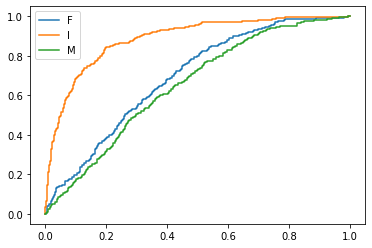

In [50]:
plt.plot(fpr[1], tpr[1], label='F')
plt.plot(fpr[2], tpr[2], label='I')
plt.plot(fpr[0], tpr[0], label='M')
plt.legend()

In [49]:
stp.mapping

{'M': 0, 'F': 1, 'I': 2}

### AUC

In [176]:
from sklearn.metrics import auc

In [179]:
stp.mapping.items()

dict_items([('M', 0), ('F', 1), ('I', 2)])

In [177]:
auc(fpr[0], tpr[0])

0.651164695699186

In [36]:
cross_val_score(xg, X_test, y_test, scoring="roc_auc_ovr")

array([0.75208911, 0.71543031, 0.70807238, 0.69050291, 0.73149674])

In [37]:
cross_val_score(xg, X_test, y_test, scoring="roc_auc_ovo")

array([0.7536473 , 0.71747744, 0.71021752, 0.69234259, 0.73401856])

### Performance

In [39]:
predictions = xg.predict(X_test)
predictions

array([1, 0, 1, ..., 2, 0, 1])

In [40]:
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[224, 164,  75],
       [173, 164,  47],
       [ 72,  34, 301]])

In [42]:
# AUC of each class against the rest (average == macro by default)
roc_auc_score(y_test, proba, multi_class='ovr')

0.7431599584150431

In [52]:
roc_auc_score(y_test, proba, multi_class='ovr', average='weighted')

0.7399781638221404

In [101]:
# computes the average AUC
roc_auc_score(y_test, proba, multi_class='ovo')

0.7455483644232294

In [55]:
roc_auc_score(y_test, proba, multi_class='ovo', average='weighted')

0.7433485163865994

### Multiclass model

In [82]:
reload(ml)

<module 'model' from '/home/fra/Project/pyProj/mlib/model.py'>

In [83]:
import model as ml

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbm_grid_param = {'learning_rate': [0.05, 0.1, 0.01], 'n_estimators':[100, 200]}

In [86]:
gbm = ml.MultiClassifier(GradientBoostingClassifier())

In [87]:
gbm.fit(X_train, y_train)

MultiClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                               

In [88]:
gbm.tune(X_train, y_train, gbm_grid_param)

Best params:
{'learning_rate': 0.1, 'n_estimators': 100}


MultiClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                               

In [89]:
gbm.cross_validate(X_test, y_test, scoring="roc_auc_ovr")

5-Fold score: 0.731 +/- 0.012


array([0.75034706, 0.7336889 , 0.73036564, 0.71338821, 0.72962851])

In [90]:
gbm.key_drivers(features)

,name,value
0,VISCERA_WT,0.373516
1,WHOLE_WT,0.223670
2,RINGS,0.109949
3,SHUCKED_WT,0.084576
4,SHELL_WT,0.065096
5,LENGTH,0.061826
6,HEIGHT,0.050214
7,DIAMETER,0.031155


### XGB

In [91]:
reload(ml)

<module 'model' from '/home/fra/Project/pyProj/mlib/model.py'>

In [92]:
xgb_grid_param = {'n_estimators': [50, 100], 'max_depth': [3, 4]}

In [93]:
xgmulti = ml.MultiClassifier(xgb.XGBClassifier())

In [94]:
xgmulti.tune(X_train, y_train, xgb_grid_param)

Best params:
{'max_depth': 3, 'n_estimators': 50}


MultiClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=1, gamma=0, gpu_id=-1,
                                        importance_type='gain',
                                        interaction_constraints='',
                                        learning_rate=0.300000012,
                                        max_delta_step=0, max_depth=3,
                                        min_child_weight=1, missing=nan,
                                        monotone_constraints='()',
                                        n_estimators=50, n_jobs=0,
                                        num_parallel_tree=1,
                                        objective='multi:softprob',
                                        random_state=0, reg_alpha=0,
                                        reg_lambda=1, scale_pos_weight=None,
             

In [95]:
xgmulti.cross_validate(X_test, y_test)

5-Fold score: 0.549 +/- 0.016


array([0.56573705, 0.55378486, 0.52988048, 0.52988048, 0.564     ])

In [96]:
xgmulti.cross_validate(X_test, y_test, scoring="roc_auc_ovr")

5-Fold score: 0.734 +/- 0.017


array([0.7540559 , 0.7366298 , 0.72424903, 0.707176  , 0.74831172])

In [97]:
xgmulti.cross_validate(X_test, y_test, scoring="roc_auc_ovo")

5-Fold score: 0.736 +/- 0.017


array([0.75636148, 0.73878341, 0.72637382, 0.70931201, 0.75105122])

In [98]:
xgmulti.key_drivers(features)

,name,value
0,VISCERA_WT,0.309945
1,WHOLE_WT,0.189944
2,RINGS,0.183934
3,SHELL_WT,0.085007
4,SHUCKED_WT,0.062536
5,LENGTH,0.062128
6,HEIGHT,0.059132
7,DIAMETER,0.047374


### Multiclass evaluator

In [266]:
reload(ml)
reload(plot)

<module 'plot' from '/home/fra/Project/pyProj/mlib/plot.py'>

In [267]:
mev = ml.MultiClassificationEvaluator(xgmulti)

In [269]:
proba = xgmulti.predict_proba(X_test)
proba

array([[0.55089635, 0.423099  , 0.02600463],
       [0.552761  , 0.40754214, 0.03969686],
       [0.4149779 , 0.48718175, 0.09784038],
       ...,
       [0.10498285, 0.03643984, 0.8585774 ],
       [0.43137622, 0.5632297 , 0.00539413],
       [0.49833924, 0.49852502, 0.00313574]], dtype=float32)

In [270]:
mev.get_lift(y_test, proba, False)

In [256]:
mev.performance_summary(X_test, y_test, stp.mapping)

{'Accuracy': 0.5582137161084529,
 'Consfusion Matrix': array([[235, 144,  84],
        [195, 137,  52],
        [ 59,  20, 328]]),
 'AUC': {'M': 0.6800342951072132,
  'F': 0.7080235272988505,
  'I': 0.8958007594371231},
 'GINI': {0: 0.3600685902144265, 1: 0.4160470545977011, 2: 0.7916015188742462}}

In [257]:
mev.get_auc(X_test, y_test, stp.mapping)

{'M': 0.6800342951072132, 'F': 0.7080235272988505, 'I': 0.8958007594371231}

In [186]:
mev.get_gini(X_test, y_test, stp.mapping)

{0: 0.3600685902144265, 1: 0.4160470545977011, 2: 0.7916015188742462}

In [187]:
mev.get_gini(X_test, y_test)

{0: 0.3600685902144265, 1: 0.4160470545977011, 2: 0.7916015188742462}

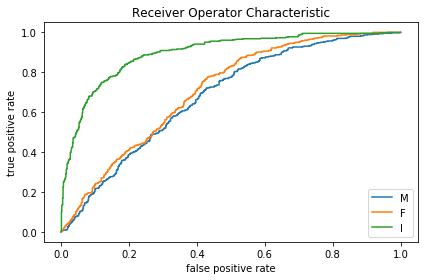

In [173]:
mev.plot_roc_curve(X_test, y_test, stp.mapping)

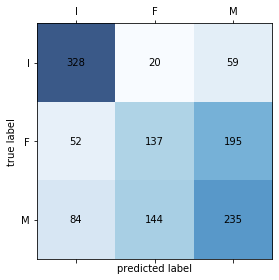

In [174]:
mev.plot_confusion_matrix(X_test, y_test, stp.mapping)

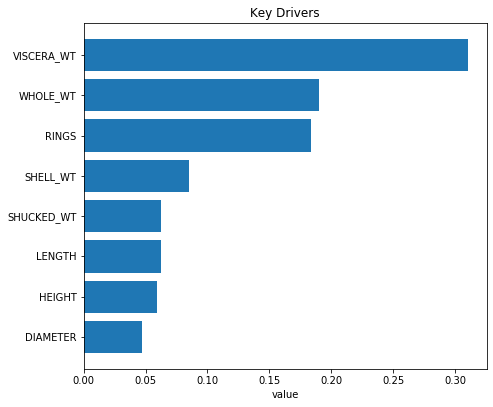

In [124]:
mev.plot_top_drivers(features)

In [110]:
mev.performance_summary(X_test, y_test)

{'Accuracy': 0.5582137161084529,
 'Consfusion Matrix': array([[235, 144,  84],
        [195, 137,  52],
        [ 59,  20, 328]]),
 'AUC': 0.761286193947729,
 'Gini': 0.522572387895458}

In [115]:
mev.performance_summary(X_test, y_test, roc_multi_class = 'ovo')

{'Accuracy': 0.5582137161084529,
 'Consfusion Matrix': array([[235, 144,  84],
        [195, 137,  52],
        [ 59,  20, 328]]),
 'AUC': 0.763797811254952,
 'Gini': 0.5275956225099041}